In [33]:
from datetime import date

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

start_date = '2000-01-01'
name = '^HSI'
stock = yf.download(name, start=start_date, interval='1mo')
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,17057.699219,17426.160156,14763.969727,15532.339844,15532.339844,0
2000-02-01,15600.259766,17939.269531,15580.459961,17169.439453,17169.439453,0
2000-03-01,17267.269531,18397.570312,16315.040039,17406.539062,17406.539062,0
2000-04-01,17444.480469,17458.060547,14624.330078,15519.299805,15519.299805,0
2000-05-01,15751.030273,15912.269531,13596.629883,14713.860352,14713.860352,0
...,...,...,...,...,...,...
2024-04-01,16811.740234,18031.160156,16044.450195,17763.029297,17763.029297,60561227500
2024-05-01,17760.679688,19706.119141,17740.619141,18079.609375,18079.609375,74518270400
2024-06-01,18283.560547,18724.619141,17583.189453,17718.609375,17718.609375,54373516600


In [43]:
unrate = pd.read_csv('/Users/henrywzh/Documents/data/UNRATE.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.set_index('DATE', inplace=True)
unrate['UNRATE Diff'] = unrate['UNRATE'].diff().fillna(0)
unrate['UNRATE % Change'] = unrate['UNRATE'].pct_change().fillna(0)
unrate

,UNRATE,UNRATE Diff,UNRATE % Change
DATE,,,
1948-01-01,3.4,0.0,0.000000
1948-02-01,3.8,0.4,0.117647
1948-03-01,4.0,0.2,0.052632
1948-04-01,3.9,-0.1,-0.025000
1948-05-01,3.5,-0.4,-0.102564
...,...,...,...
2024-01-01,3.7,0.0,0.000000
2024-02-01,3.9,0.2,0.054054
2024-03-01,3.8,-0.1,-0.025641


In [44]:
jolt = pd.read_csv('/Users/henrywzh/Documents/data/JOLT.csv')
jolt['DATE'] = pd.to_datetime(jolt['DATE'])
jolt.set_index('DATE', inplace=True)
jolt['JOLT Diff'] = jolt['JTSOSL'].diff().fillna(0)
jolt['JOLT % Change'] = jolt['JTSOSL'].pct_change().fillna(0)
jolt

,JTSOSL,JOLT Diff,JOLT % Change
DATE,,,
2000-12-01,340,0.0,0.000000
2001-01-01,377,37.0,0.108824
2001-02-01,323,-54.0,-0.143236
2001-03-01,379,56.0,0.173375
2001-04-01,367,-12.0,-0.031662
...,...,...,...
2024-02-01,332,-75.0,-0.184275
2024-03-01,320,-12.0,-0.036145
2024-04-01,343,23.0,0.071875


-0.07225279841400462


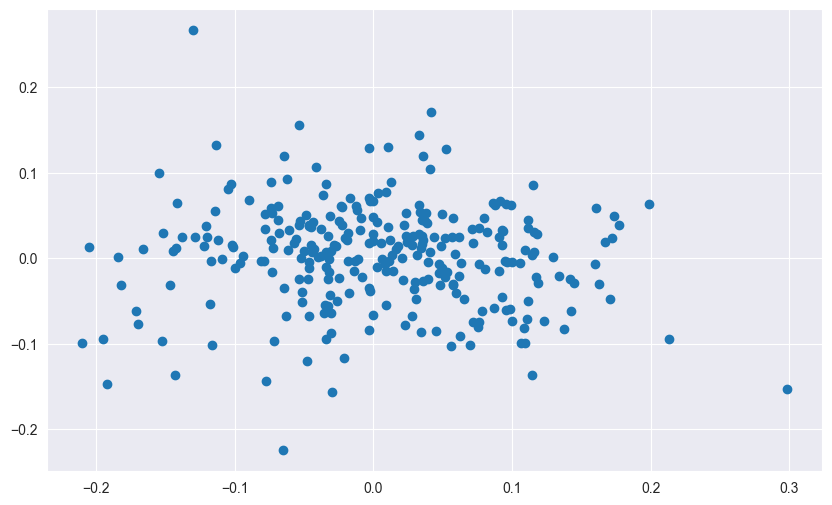

In [56]:
temp = pd.merge(jolt, stock['Close'], left_index=True, right_index=True)
temp = pd.merge(temp, unrate, left_index=True, right_index=True)
temp['Future Return'] = temp['Close'].pct_change().shift(-1)

print(temp['JOLT % Change'].corr(temp['Future Return']))
plt.figure(figsize=(10, 6))
plt.scatter(temp['JOLT % Change'], temp['Future Return'])
plt.show()

0.08074127050873951


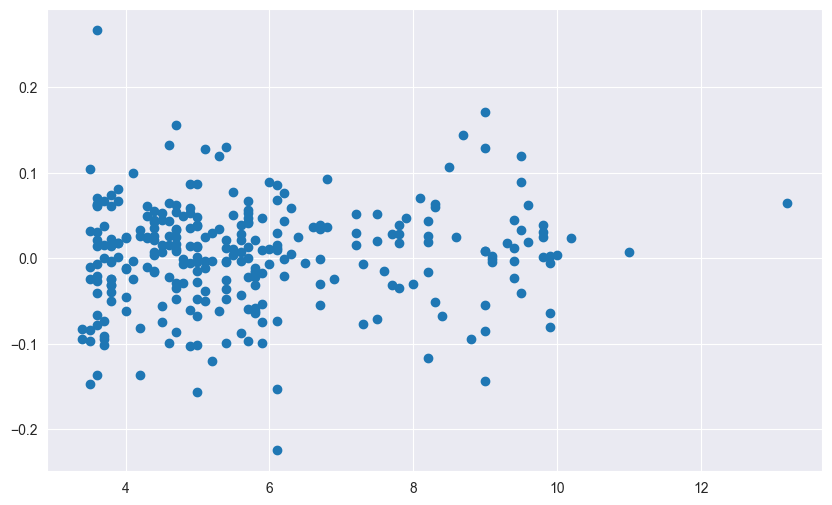

In [58]:
temp1 = temp[temp['UNRATE Diff'] < 4]
print(temp1['UNRATE'].corr(temp1['Future Return']))
plt.figure(figsize=(10, 6))
plt.scatter(temp1['UNRATE'], temp1['Future Return'])
plt.show()